<a href="https://colab.research.google.com/github/ArySuby/Proyecto_CoderDS_SUBY_Ary2daparte/blob/main/ModeloMerlu2004_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
# --- Setup inicial ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [69]:
from google.colab import files
uploaded = files.upload()

Saving merluza2004_2024.xlsx to merluza2004_2024.xlsx


In [70]:
df = pd.read_excel("merluza2004_2024.xlsx", parse_dates=["fecha"])

In [71]:
df["sexo"] = df["sexo"].astype(str).str.strip()


In [72]:
print(df["sexo"].unique())

['2' '1']


In [73]:
print(df["sexo"].value_counts(dropna=False))


sexo
2    100078
1     68663
Name: count, dtype: int64


In [74]:
print(df["largo_tot"].min())


15


In [75]:
print([int(x) for x in sorted(df["largo_tot"].unique())])


[15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 95]


In [76]:
# --- Previsualizar ---
print("Primeras filas:")
print(df.head())
print(len(df))
print("\nColumnas disponibles:", df.columns.tolist())

Primeras filas:
       fecha  n_ejemp  largo_tot sexo  edad
0 2016-01-05        1         16    2     1
1 2016-01-05        2         19    1     1
2 2016-01-05        3         25    1     1
3 2016-01-05        4         26    1     1
4 2016-01-05        5         27    1     2
168741

Columnas disponibles: ['fecha', 'n_ejemp', 'largo_tot', 'sexo', 'edad']


In [77]:
# --- Preprocesamiento ---
# Convertir fecha a datetime
df["fecha"] = pd.to_datetime(df["fecha"], errors='coerce')

# Eliminar filas con valores faltantes en columnas relevantes
df = df.dropna(subset=["largo_tot", "sexo", "edad", "fecha"])

In [78]:
# Variables predictoras y objetivo
X = df[["largo_tot", "sexo"]].copy()
y = df["edad"]

# Codificar sexo
X["sexo"] = X["sexo"].astype("category").cat.codes

In [79]:
# --- División de datos ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [80]:
# --- Modelo Lineal ---
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# --- Modelo No Lineal (Random Forest) ---
rf = RandomForestRegressor(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [81]:
# --- Evaluación ---
def evaluar_modelo(nombre, y_test, y_pred):
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"\n{nombre} - RMSE:", rmse)
    print(f"{nombre} - R2:", r2)

evaluar_modelo("Regresión Lineal", y_test, y_pred_lr)
evaluar_modelo("Random Forest", y_test, y_pred_rf)


Regresión Lineal - RMSE: 0.6997729199513744
Regresión Lineal - R2: 0.7383101918982437

Random Forest - RMSE: 0.6475478290803524
Random Forest - R2: 0.7759132137531783


In [82]:
# Coeficientes del modelo
coeficientes = pd.DataFrame(lr.coef_, X.columns, columns=["Coeficiente"])
print(coeficientes)

           Coeficiente
largo_tot     0.129302
sexo         -0.455409


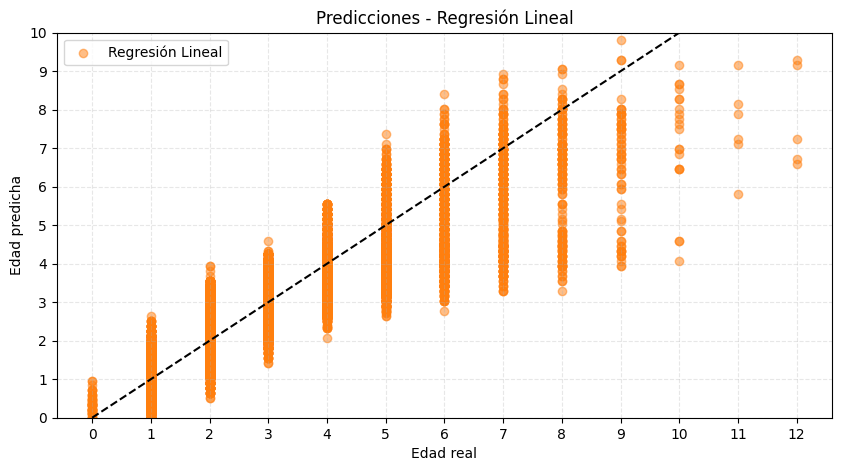

In [83]:
# --- Visualización solo para Regresión Lineal ---
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_lr, alpha=0.5, label="Regresión Lineal", color='C1')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')

plt.xlabel("Edad real")
plt.ylabel("Edad predicha")
plt.legend()
plt.title("Predicciones - Regresión Lineal")

# Establecer ticks de a uno en uno
plt.xticks(np.arange(y_test.min(), y_test.max() + 1, 1))
plt.yticks(np.arange(0, 11, 1))
plt.ylim(0, 10)
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

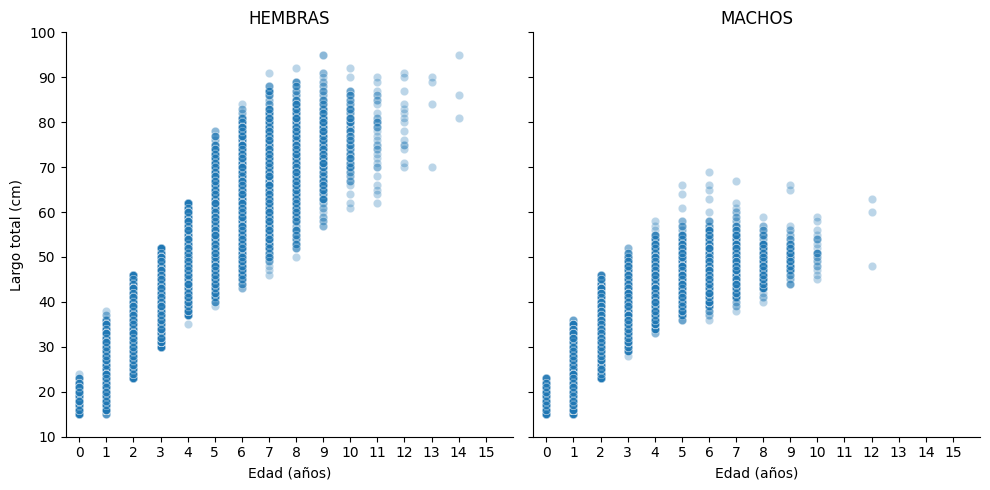

In [84]:
# Diccionario para los títulos y colores
sexo_labels = {1: "MACHOS", 2: "HEMBRAS"}
colores = {1: "blue", 2: "red"}

# FacetGrid por sexo con palette para los colores
g = sns.FacetGrid(df, col="sexo", height=5, aspect=1, palette=colores)

# Usar map_dataframe para graficar con ejes invertidos
g.map_dataframe(sns.scatterplot, x="edad", y="largo_tot", alpha=0.3)

# Etiquetas y ejes
g.set_axis_labels("Edad (años)", "Largo total (cm)")
g.set(xticks=np.arange(0, 16, 1))       # Eje X (edad): de 0 a 12, paso 1
g.set(xlim=(-0.5, 16))                  # Limites del eje X
g.set(yticks=np.arange(10, 101, 10))      # Eje Y (largo): de 10 a 90, paso 5
g.set(ylim=(10, 100))                    # Limites del eje Y

# Reemplazar títulos por MACHOS y HEMBRAS
for ax, title in zip(g.axes.flat, g.col_names):
    ax.set_title(sexo_labels[int(title)])

plt.tight_layout()
plt.show()


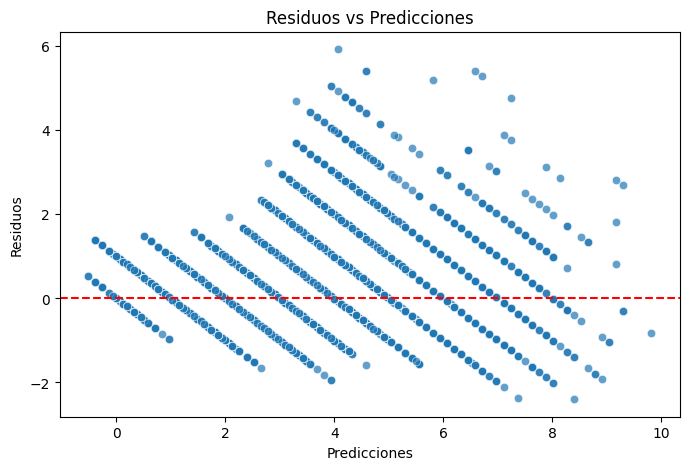

In [85]:
###SUPUESTOS A CUMPLIR###
#### 1-Linealidad: la relación entre las variables predictoras y la variable objetivo es lineal.###
#### 2-Homoscedasticidad: los residuos deben tener varianza constante.####

# Calcular residuos
y_pred = lr.predict(X_test)
residuos = y_test - y_pred

# Gráfico de residuos vs predicciones
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred, y=residuos, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicciones")
plt.ylabel("Residuos")
plt.title("Residuos vs Predicciones")
plt.show()


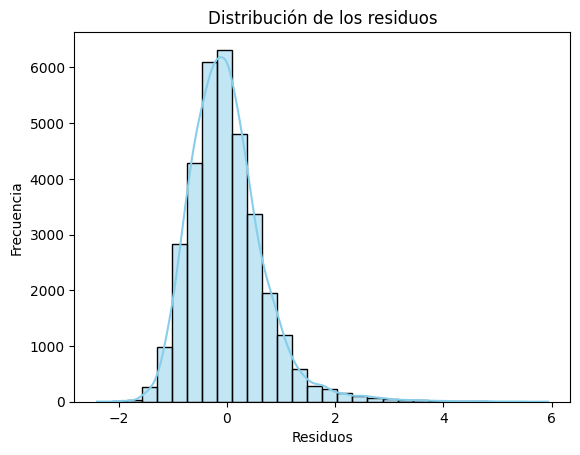

In [86]:
####SUPUESTO 3 - Prueba de normalidad de los residuos###
sns.histplot(residuos, kde=True, bins=30, color='skyblue')
plt.title("Distribución de los residuos")
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.show()


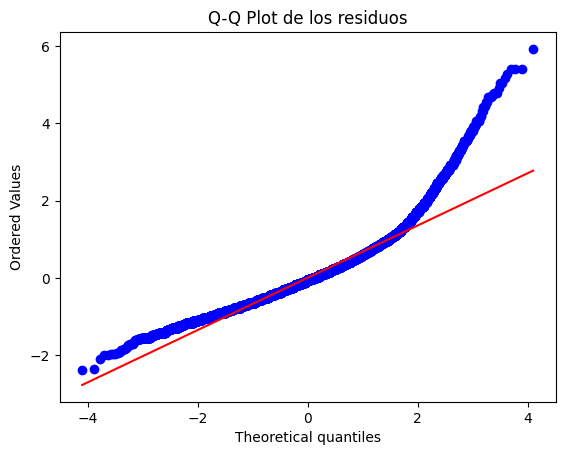

In [87]:
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(residuos, dist="norm", plot=plt)
plt.title("Q-Q Plot de los residuos")
plt.show()


<Axes: xlabel='residuos', ylabel='Count'>

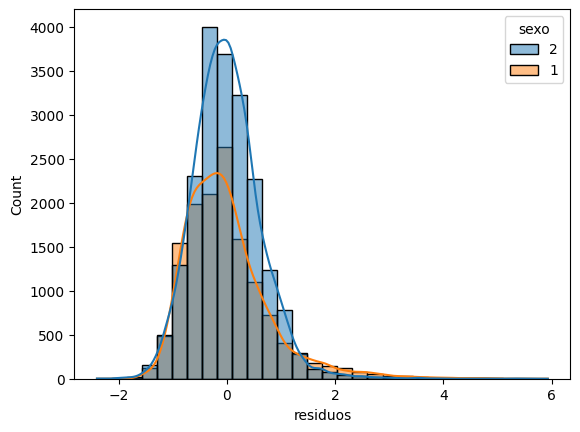

In [88]:
df["residuos"] = residuos
sns.histplot(data=df, x="residuos", hue="sexo", kde=True, bins=30)

Porcentaje de acierto - Regresión Lineal: 59.66%


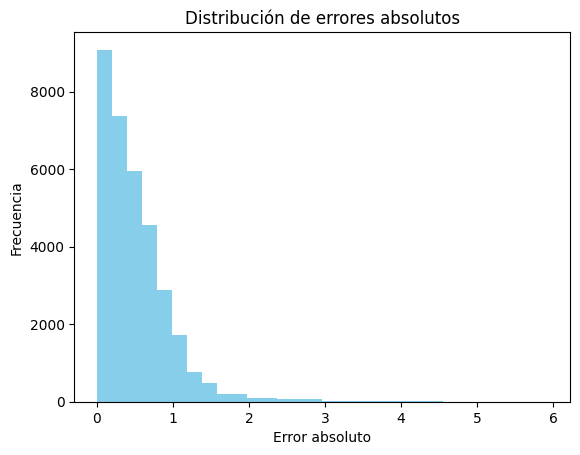

In [89]:
# Predicciones del modelo lineal
predicciones_lr = y_pred_lr

# 20% de margen de error
margen_error = 0.20
limite_superior = y_test * (1 + margen_error)
limite_inferior = y_test * (1 - margen_error)

# Calcular aciertos
aciertos = (predicciones_lr >= limite_inferior) & (predicciones_lr <= limite_superior)
porcentaje_acierto_lr = aciertos.mean() * 100
print(f"Porcentaje de acierto - Regresión Lineal: {porcentaje_acierto_lr:.2f}%")

# Calcular errores absolutos y graficar histograma
errores = abs(y_test - predicciones_lr)
plt.hist(errores, bins=30, color='skyblue')
plt.xlabel("Error absoluto")
plt.ylabel("Frecuencia")
plt.title("Distribución de errores absolutos")
plt.show()

        edad  predicciones_lr   errores
191       10         5.621411  4.378589
1662       9         4.328393  4.671607
3796       9         4.069790  4.930210
4007      14         8.010642  5.989358
4060      12         5.750713  6.249287
...      ...              ...       ...
168183     9         4.907399  4.092601
168256     9         3.681884  5.318116
168396     9         3.940488  5.059512
168502     8         3.681884  4.318116
168519    11         6.588323  4.411677

[192 rows x 3 columns]


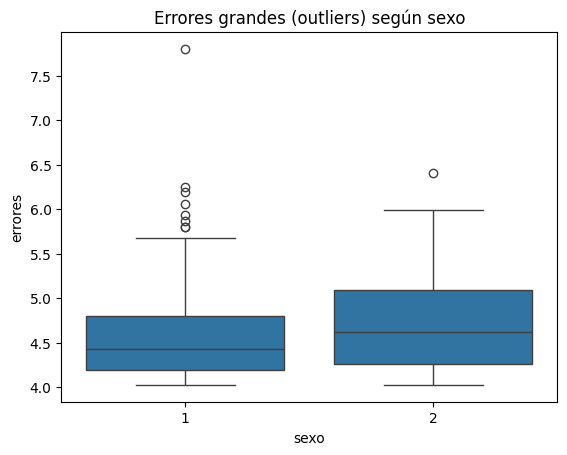

In [90]:
# Predecir para todo el DataFrame
y_pred_lr_full = lr.predict(X)  # Usar X completo, no solo X_test

# Agregar las predicciones al DataFrame
df["predicciones_lr"] = y_pred_lr_full

# Calcular los errores absolutos
df["errores"] = abs(df["edad"] - df["predicciones_lr"])

# Filtrar los outliers (errores absolutos mayores a 4)
outliers = df[df["errores"] > 4]

# Mostrar los outliers
print(outliers[["edad", "predicciones_lr", "errores"]])

# Visualización de outliers según sexo
sns.boxplot(data=outliers, x="sexo", y="errores")
plt.title("Errores grandes (outliers) según sexo")
plt.show()



        edad  predicciones_lr   errores
4007      14         8.010642  5.989358
4060      12         5.750713  6.249287
14583     10         4.974902  5.025098
21206     10         4.199091  5.800909
28653     10         4.328393  5.671607
37325     10         4.716299  5.283701
37669      9         3.940488  5.059512
40994     10         4.974902  5.025098
41193     10         4.457695  5.542305
45251     10         4.328393  5.671607
57446     10         4.586997  5.413003
63351     14         8.657152  5.342848
70070     10         4.586997  5.413003
74718     10         4.069790  5.930210
77341      9         3.681884  5.318116
83730     10         4.845601  5.154399
84361     12         6.588323  5.411677
88911      9         3.811186  5.188814
89484     10         3.811186  6.188814
92062      9         3.811186  5.188814
92917     12         4.199091  7.800909
108929     9         3.681884  5.318116
114208    10         4.586997  5.413003
123008    12         6.717624  5.282376


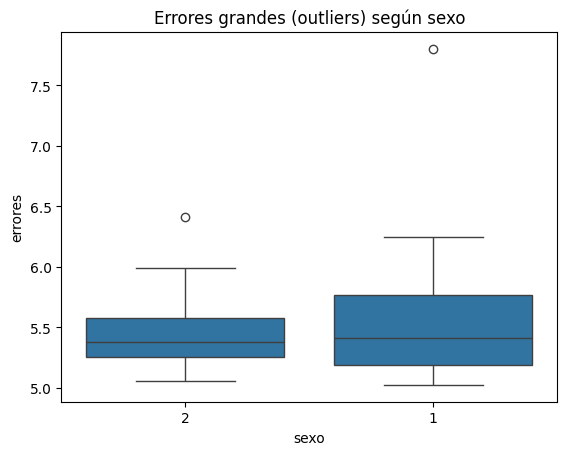

In [91]:
# Calcular los errores absolutos
df["errores"] = abs(df["edad"] - df["predicciones_lr"])

# Filtrar los outliers (errores absolutos mayores a 5)
outliers = df[df["errores"] > 5]

# Mostrar los outliers
print(outliers[["edad", "predicciones_lr", "errores"]])

# Visualización de outliers según sexo
sns.boxplot(data=outliers, x="sexo", y="errores")
plt.title("Errores grandes (outliers) según sexo")
plt.show()


In [93]:
# Filtrar los ejemplares con un residuo mayor o igual a 6
outliers = df[df["errores"] >= 6]

# Mostrar largo, edad y sexo de los ejemplares con error mayor o igual a 6
print(outliers[["edad", "largo_tot", "sexo", "errores"]])


        edad  largo_tot sexo   errores
4060      12         60    1  6.249287
89484     10         45    1  6.188814
92917     12         48    1  7.800909
135423    13         70    2  6.411677
152777    10         46    1  6.059512
